In [1]:
import pandas as pa

In [2]:
dict = { 'CA' : [220, 280, 250, 170, 150, 340, 310, 210, 180, 190],
'FP': [2.6, 2.6, 2.4, 1.5, 0.9, 3.0, 2.7, 2.3, 1.7, 1.9]}
df = pa.DataFrame(data=dict)
df.head()

,CA,FP
0,220,2.6
1,280,2.6
2,250,2.4
3,170,1.5
4,150,0.9


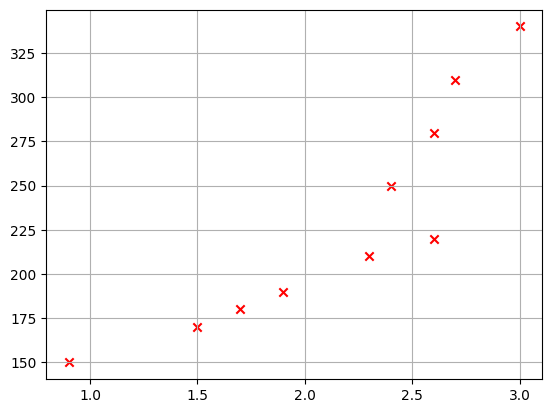

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.grid()
plt.scatter(df['FP'], df['CA'], color='red', marker='x')

In [4]:
df.corr()

,CA,FP
CA,1.000000,0.893758
FP,0.893758,1.000000


In [5]:
from scipy import stats
help(stats.linregress)

Help on function linregress in module scipy.stats._stats_mstats_common:

linregress(x, y=None, alternative='two-sided')
    Calculate a linear least-squares regression for two sets of measurements.
    
    Parameters
    ----------
    x, y : array_like
        Two sets of measurements.  Both arrays should have the same length.  If
        only `x` is given (and ``y=None``), then it must be a two-dimensional
        array where one dimension has length 2.  The two sets of measurements
        are then found by splitting the array along the length-2 dimension. In
        the case where ``y=None`` and `x` is a 2x2 array, ``linregress(x)`` is
        equivalent to ``linregress(x[0], x[1])``.
    alternative : {'two-sided', 'less', 'greater'}, optional
        Defines the alternative hypothesis. Default is 'two-sided'.
        The following options are available:
    
        * 'two-sided': the slope of the regression line is nonzero
        * 'less': the slope of the regression line is l

In [6]:
x = df['FP']
y = df['CA']
a, b, rvalue, pvalue, _, = stats.linregress(x,y)

In [7]:
y_hat = a * x + b

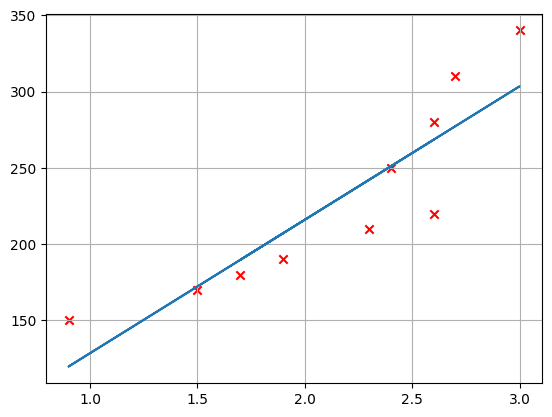

In [8]:
plt.grid()
plt.scatter(x, y, color='red', marker='x')
plt.plot(x, y_hat)

In [9]:
R2 = rvalue ** 2
print('{:2.2%}'.format(R2), 'de la variation du CA est expliquée par les FP')

79.88% de la variation du CA est expliquée par les FP


On pose l'hypothèse

H0 : a = 0

Et on la teste au risque \alpha = 5%

In [10]:
print(pvalue)
if pvalue < .05 :
    print('On rejette H0 au risque 5%')
else:
    print('On accepte H0')

0.0004894341749604697
On rejette H0 au risque 5%


Conclusion : la réfression est bien pertinente et les frais publicitaires ont bien un impact sur le chiffre d'affaires.

In [11]:
def predict(fp):
    return a * fp + b
    
print(predict(400))

print(predict(4000))

35004.006376195524
349669.2561105206


Exercice 2. Régression linéaire multiple

Nous sommes intéressés à savoir quels sont les facteurs importants qui influencent ou déterminent la valeur d’une propriété et à construire un modèle qui nous aidera à évaluer cette valeur selon ces facteurs. Pour ce faire, nous avons obtenu la valeur totale pour un échantillon de 79 propriétés dans une région donnée. Voir le fichier proprietes.csv disponible à l’adresse :

http://www.labri.fr/~zemmari/ia_data/datasets/proprietes.csv

Le fichier contient les variables suivantes correspondant chacune à un facteur :

Valeur Totale : valeur globale de la propriété
Valeur Terrain : valeur du terrain sur lequel est bâtie la maison
Acre : Superficie en acres
Pieds2 : Superficie en pieds au carré
Extérieur : Etat extérieur
Chauffage : Type du chauffage utilisé
Pièces : Nombre de pièces dans la maison
Chambres : Nombre de chambres dans la maison
SbainsC : Nombre de salles de bain complètes
Sbains : Nombre de salles de bain non complètes
Foyers : Nombre de foyers
Garage : Indique si la propriété contient un garage ou non.
Après avoir chargé les données dans un DataFrame vous pouvez visualiser les premières entrées avec la fonction head et inspecter globalement les données avec la fonction info.

In [13]:
df = pa.read_csv('http://www.labri.fr/~zemmari/datasets/proprietes.csv', delimiter = ';')
df.head()

,Valeur Totale,Valeur Terrain,Acre,Pied2,Extérieur,Chauffage,Pièces,Chambre,SbainsC,Sbains,Foyers,Garage
0,199657,63247,"1,63",1726,Good,NatGas,8,4,2,1,2,Garage
1,78482,38091,"0,495",1184,Good,NatGas,6,2,1,0,0,NoGarage
2,119962,37665,"0,375",1014,Good,Electric,7,3,2,0,1,Garage
3,116492,54062,"0,981",1260,Average,Electric,6,3,2,0,1,Garage
4,131263,61546,"1,14",1314,Average,NatGas,8,4,2,1,2,NoGarage


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Valeur Totale   79 non-null     int64 
 1   Valeur Terrain  79 non-null     int64 
 2   Acre            79 non-null     object
 3   Pied2           79 non-null     int64 
 4   Extérieur       79 non-null     object
 5   Chauffage       79 non-null     object
 6   Pièces          79 non-null     int64 
 7   Chambre         79 non-null     int64 
 8   SbainsC         79 non-null     int64 
 9   Sbains          79 non-null     int64 
 10  Foyers          79 non-null     int64 
 11  Garage          79 non-null     object
dtypes: int64(8), object(4)
memory usage: 7.5+ KB


In [20]:
# Y a-t-il un lien entre la valeur totale et les différents facteurs ?

def get_columns_from(df, start_col, num_cols):
    # Renvoie le nom de 'num_cols' colonnes à partir de la colonne 'start_col'
    start_idx = df.columns.get_loc(start_col)
    end_idx = start_idx + num_cols
    return df.columns[start_idx:end_idx].tolist()

cols_to_get = get_columns_from(df, 'Valeur Terrain', 7)
print(cols_to_get)

# Remplacements par des valeurs numériques de extérieur
remplacements = {"Good": 1, "Average": 0}
df['Extérieur'] = df['Extérieur'].replace(remplacements)
df.head()

['Valeur Terrain', 'Acre', 'Pied2', 'Extérieur', 'Chauffage', 'Pièces', 'Chambre']


,Valeur Totale,Valeur Terrain,Acre,Pied2,Extérieur,Chauffage,Pièces,Chambre,SbainsC,Sbains,Foyers,Garage
0,199657,63247,"1,63",1726,1,NatGas,8,4,2,1,2,Garage
1,78482,38091,"0,495",1184,1,NatGas,6,2,1,0,0,NoGarage
2,119962,37665,"0,375",1014,1,Electric,7,3,2,0,1,Garage
3,116492,54062,"0,981",1260,0,Electric,6,3,2,0,1,Garage
4,131263,61546,"1,14",1314,0,NatGas,8,4,2,1,2,NoGarage


Correction du prof

In [26]:
y = df['Valeur Totale']
Colonnes = ['Valeur Terrain', 'Pied2', 'Pièces', 'Chambre', 'SbainsC', 'Sbains', 'Foyers']

X = df['Valeur Terrain']

a, b, r, p, _ = stats.linregress(X, y)

R2 = r ** 2

print('R^2 = ', R2)
print(' ==> {:2.2%} de la variabilité de la Valeur Totale est expliquée par {}'.format(R2, X.name))

R^2 =  0.6637115265551455
 ==> 66.37% de la variabilité de la Valeur Totale est expliquée par Valeur Terrain


On peut généraliser pour toutes les colonnes

In [39]:
y = df['Valeur Totale']
Colonnes = ['Valeur Terrain', 'Pied2', 'Pièces', 'Chambre', 'SbainsC', 'Sbains', 'Foyers']

i = 1
for c in Colonnes:
    print('----------------------------------------------------------------------------------------------------\n')
    print('Modèle n°', i)
    X = df[c]
    a, b, r, p, _ = stats.linregress(X, y)
    print('Valeur Totale = ', a, '*', c, '+', b)
    R2 = r ** 2
    print('      R^2 = ', R2)
    print('          ==> {:2.2%} de la variabilité de la Valeur Totale est expliquée par {}'.format(R2, X.name))
    print('      On teste l\'hypothèse H0 : beta_1 = 0 au risque alpha = 5%')
    print('      p_value = ', p)
    if p < .05 :
        print('On rejette H0 au risque 5%')
        print(c, ' a bien un impact sur la Valeur Totale')
    else:
        print('On accepte H0')
    print('\n')

----------------------------------------------------------------------------------------------------

Modèle n° 1
Valeur Totale =  2.9912868581874625 * Valeur Terrain + -9870.846451247635
      R^2 =  0.6637115265551455
          ==> 66.37% de la variabilité de la Valeur Totale est expliquée par Valeur Terrain
      On teste l'hypothèse H0 : beta_1 = 0 au risque alpha = 5%
      p_value =  6.636865062557978e-20
On rejette H0 au risque 5%
Valeur Terrain  a bien un impact sur la Valeur Totale


----------------------------------------------------------------------------------------------------

Modèle n° 1
Valeur Totale =  101.939153456249 * Pied2 + 16208.538146922976
      R^2 =  0.5875378229047032
          ==> 58.75% de la variabilité de la Valeur Totale est expliquée par Pied2
      On teste l'hypothèse H0 : beta_1 = 0 au risque alpha = 5%
      p_value =  1.8250569973875542e-16
On rejette H0 au risque 5%
Pied2  a bien un impact sur la Valeur Totale


--------------------------------

In [40]:
y = df['Valeur Totale']
Colonnes = ['Valeur Terrain', 'Pied2', 'Pièces', 'Chambre', 'SbainsC', 'Sbains', 'Foyers']
X = df[Colonnes]

In [46]:
from statsmodels.regression.linear_model import OLS
import matplotlib.pyplot as plt

model = OLS(y, X)
report = model.fit()
report.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          Valeur Totale   R-squared (uncentered):                   0.975
Model:                            OLS   Adj. R-squared (uncentered):              0.973
Method:                 Least Squares   F-statistic:                              400.2
Date:                Fri, 13 Oct 2023   Prob (F-statistic):                    5.72e-55
Time:                        15:30:17   Log-Likelihood:                         -932.78
No. Observations:                  79   AIC:                                      1880.
Df Residuals:                      72   BIC:                                      1896.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Valeur Terrain     1.5608      0.218      7.174      0.000       1.127       1.994
Pied2             47.0670      7.881      5.972      0.000      31.356      62.779
Pièces         -9119.9321   3285.492     -2.776      0.007   -1.57e+04   -2570.424
Chambre         1.006e+04   6020.740      1.670      0.099   -1946.373    2.21e+04
SbainsC         1.071e+04   4071.081      2.631      0.010    2593.810    1.88e+04
Sbains          2.769e+04   7158.494      3.868      0.000    1.34e+04     4.2e+04
Foyers          1264.6186   3644.700      0.347      0.730   -6000.958    8530.195
==============================================================================
Omnibus:                        5.331   Durbin-Watson:                   1.586
Prob(Omnibus):                  0.070   Jarque-Bera (JB):                7.562
Skew:                           0.091   Prob(JB):                       0.0228
Kurtosis:                       4.505   Cond. No.                     1.55e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.55e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""